# Statistics and Machine Learning on Blood Transfusion 

The (basic) aim of this project is to get use of Machine Learning methods on the [UCI's blood transfusion dataset](https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center) using R.

### Install dependencies

In [2]:
install.packages("ggfortify")
install.packages('klaR')
install.packages('psych')
install.packages('e1071')

also installing the dependencies 'ps', 'processx', 'callr', 'prettyunits', 'backports', 'desc', 'pkgbuild', 'rprojroot', 'rstudioapi', 'pkgload', 'praise', 'lattice', 'testthat', 'nlme', 'Matrix', 'colorspace', 'utf8', 'glue', 'gtable', 'isoband', 'MASS', 'mgcv', 'rlang', 'withr', 'ellipsis', 'assertthat', 'magrittr', 'pkgconfig', 'R6', 'tidyselect', 'BH', 'plogr', 'purrr', 'stringi', 'vctrs', 'lifecycle', 'farver', 'labeling', 'munsell', 'RColorBrewer', 'viridisLite', 'cli', 'fansi', 'pillar', 'ggplot2', 'dplyr', 'tidyr', 'gridExtra', 'scales', 'stringr', 'tibble'




  There are binary versions available but the source versions are later:
         binary source needs_compilation
pkgbuild  1.0.7  1.0.8             FALSE
pillar    1.4.3  1.4.4             FALSE
tidyr     1.0.2  1.0.3              TRUE

  Binaries will be installed
package 'ps' successfully unpacked and MD5 sums checked
package 'processx' successfully unpacked and MD5 sums checked
package 'callr' successfully unpacked and MD5 sums checked
package 'prettyunits' successfully unpacked and MD5 sums checked
package 'backports' successfully unpacked and MD5 sums checked
package 'desc' successfully unpacked and MD5 sums checked
package 'rprojroot' successfully unpacked and MD5 sums checked
package 'rstudioapi' successfully unpacked and MD5 sums checked
package 'pkgload' successfully unpacked and MD5 sums checked
package 'praise' successfully unpacked and MD5 sums checked
package 'lattice' successfully unpacked and MD5 sums checked
package 'testthat' successfully unpacked and MD5 sums checke

installing the source packages 'pkgbuild', 'pillar'

also installing the dependencies 'clipr', 'forcats', 'hms', 'readr', 'httpuv', 'mime', 'xtable', 'htmltools', 'sourcetools', 'later', 'promises', 'fastmap', 'e1071', 'class', 'KernSmooth', 'haven', 'shiny', 'miniUI', 'highr', 'classInt', 'labelled', 'combinat', 'questionr'



package 'clipr' successfully unpacked and MD5 sums checked
package 'forcats' successfully unpacked and MD5 sums checked
package 'hms' successfully unpacked and MD5 sums checked
package 'readr' successfully unpacked and MD5 sums checked
package 'httpuv' successfully unpacked and MD5 sums checked
package 'mime' successfully unpacked and MD5 sums checked
package 'xtable' successfully unpacked and MD5 sums checked
package 'htmltools' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'htmltools'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problème lors de la copie de C:\Users\Zeryab\Documents\anaconda3\Lib\R\library\00LOCK\htmltools\libs\x64\htmltools.dll vers C:\Users\Zeryab\Documents\anaconda3\Lib\R\library\htmltools\libs\x64\htmltools.dll: Permission denied"Warning message:
"restored 'htmltools'"

package 'sourcetools' successfully unpacked and MD5 sums checked
package 'later' successfully unpacked and MD5 sums checked
package 'promises' successfully unpacked and MD5 sums checked
package 'fastmap' successfully unpacked and MD5 sums checked
package 'e1071' successfully unpacked and MD5 sums checked
package 'class' successfully unpacked and MD5 sums checked
package 'KernSmooth' successfully unpacked and MD5 sums checked
package 'haven' successfully unpacked and MD5 sums checked
package 'shiny' successfully unpacked and MD5 sums checked
package 'miniUI' successfully unpacked and MD5 sums checked
package 'highr' successfully unpacked and MD5 sums checked
package 'classInt' successfully unpacked and MD5 sums checked
package 'labelled' successfully unpacked and MD5 sums checked
package 'combinat' successfully unpacked and MD5 sums checked
package 'questionr' successfully unpacked and MD5 sums checked
package 'klaR' successfully unpacked and MD5 sums checked

The downloaded binary pack

also installing the dependency 'mnormt'



package 'mnormt' successfully unpacked and MD5 sums checked
package 'psych' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Zeryab\AppData\Local\Temp\RtmpSinISS\downloaded_packages
package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Zeryab\AppData\Local\Temp\RtmpSinISS\downloaded_packages


### Load dependencies 

In [1]:
library(ggfortify)
library(class)
library(MASS)
library(klaR)
library(psych)
library(e1071)

Loading required package: ggplot2

Attaching package: 'psych'

The following objects are masked from 'package:ggplot2':

    %+%, alpha



### Reading the data

In [2]:
transfusion.data <- read.csv("https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data",colClasses=c("whether.he.she.donated.blood.in.March.2007"="factor"))
transfusion.names=names(transfusion.data)

n_training=seq(1,500)
n_test=seq(501,nrow(transfusion.data))

transfusion.training=transfusion.data[n_training,]
transfusion.test=transfusion.data[n_test,]

### Descriptive statistics

 Recency..months. Frequency..times. Monetary..c.c..blood. Time..months.  
 Min.   : 0.000   Min.   : 1.000    Min.   :  250         Min.   : 2.00  
 1st Qu.: 2.000   1st Qu.: 2.000    1st Qu.:  500         1st Qu.:16.00  
 Median : 8.000   Median : 4.000    Median : 1000         Median :28.00  
 Mean   : 9.448   Mean   : 5.268    Mean   : 1317         Mean   :33.78  
 3rd Qu.:14.000   3rd Qu.: 7.000    3rd Qu.: 1750         3rd Qu.:50.00  
 Max.   :74.000   Max.   :50.000    Max.   :12500         Max.   :98.00  

,Recency..months.,Frequency..times.,Monetary..c.c..blood.,Time..months.
Recency..months.,1.0000000,-0.1494032,-0.1494032,0.1909135
Frequency..times.,-0.1494032,1.0000000,1.0000000,0.6305909
Monetary..c.c..blood.,-0.1494032,1.0000000,1.0000000,0.6305909
Time..months.,0.1909135,0.6305909,0.6305909,1.0000000


ERROR: Error in pairs.default(x.train, pch = 21, bg = c("red", "blue")[unclass(class.train)], : objet 'class.train' introuvable


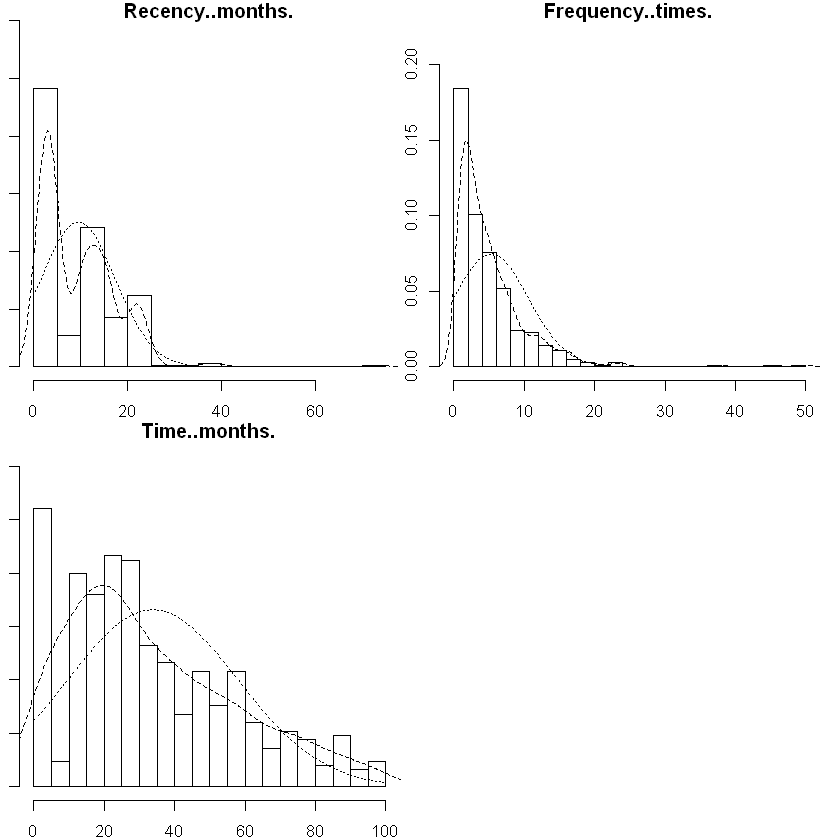

In [3]:
allVar = seq(1,4)

summary(transfusion.training[,allVar])
cor(transfusion.training[,allVar]) # Var 2 and 3 are perfectly correlated

filtVar = c(1,2,4)  
x.train=transfusion.training[,filtVar]
y.train=transfusion.training[,5]
x.test=transfusion.test[,filtVar]
y.test=transfusion.test[,5]

multi.hist(x.train)
pairs(x.train, pch = 21, bg = c("red", "blue")[unclass(class.train)] , lower.panel=NULL)
boxplot(x.train)

### Dimension reduction

Importance of components:
                         PC1   PC2    PC3
Standard deviation     1.278 1.039 0.5367
Proportion of Variance 0.544 0.360 0.0960
Cumulative Proportion  0.544 0.904 1.0000

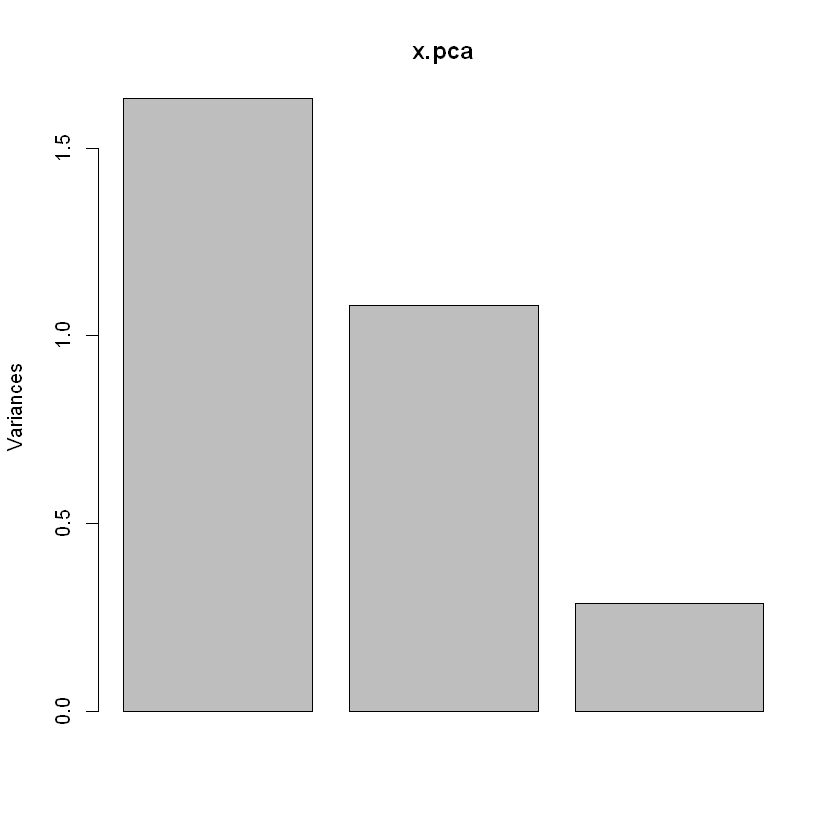

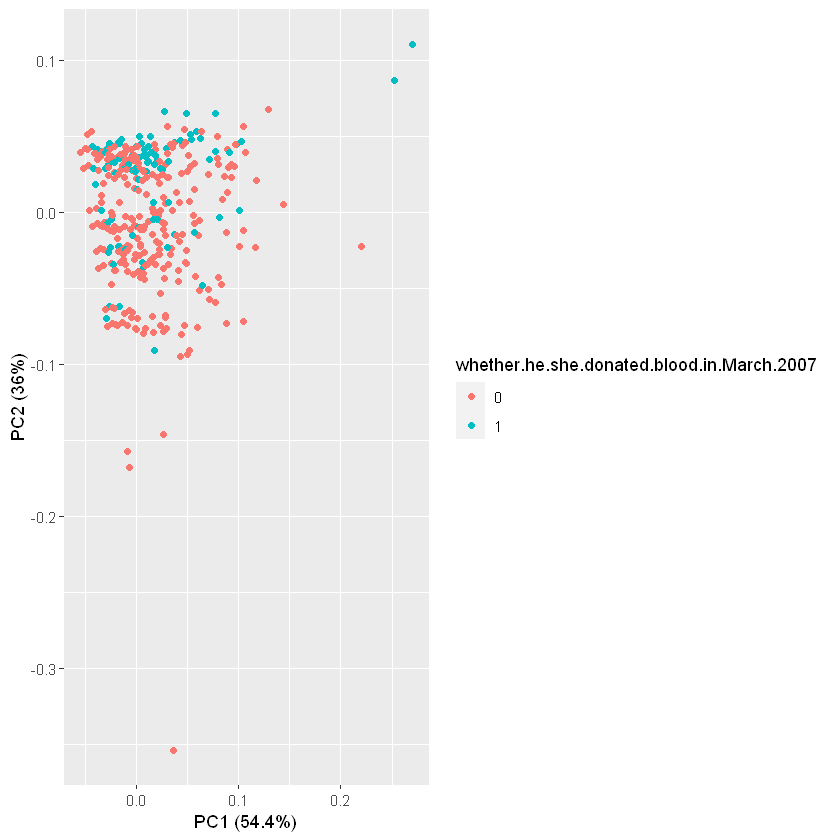

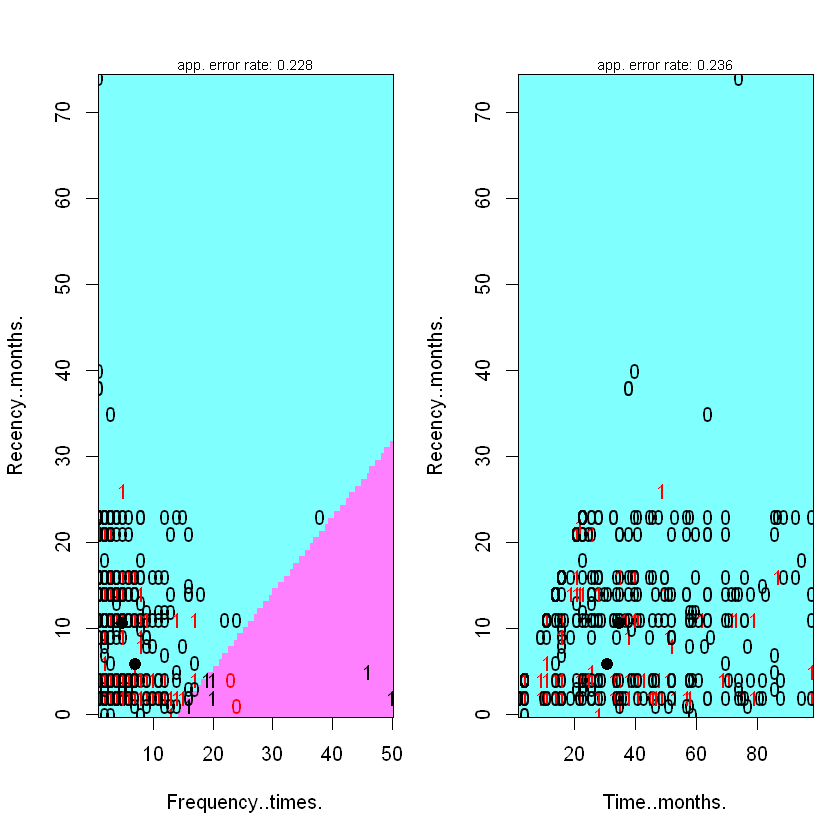

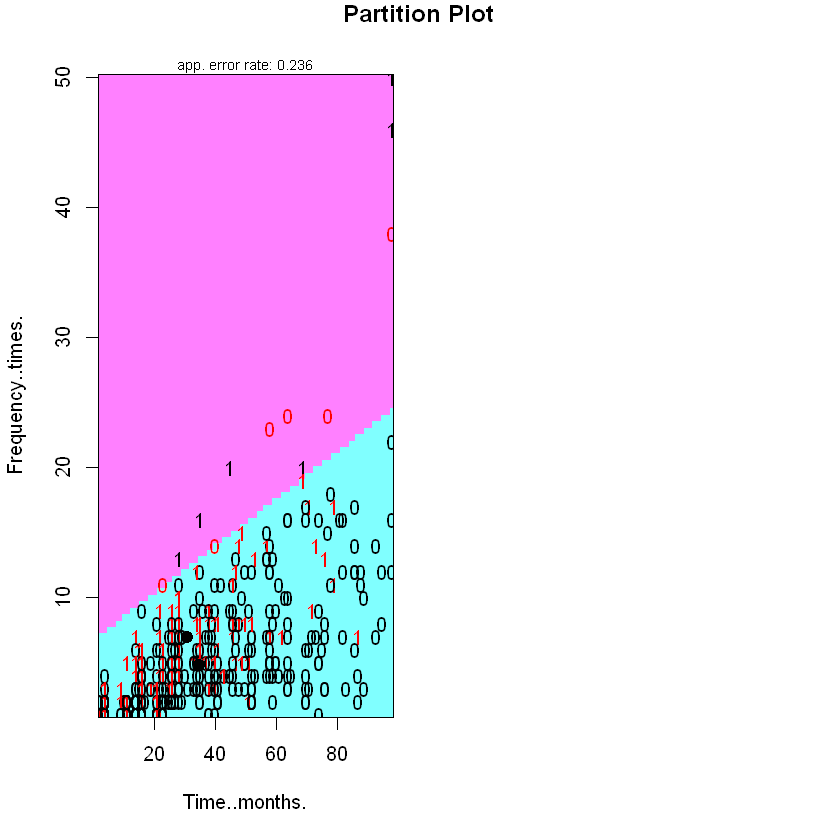

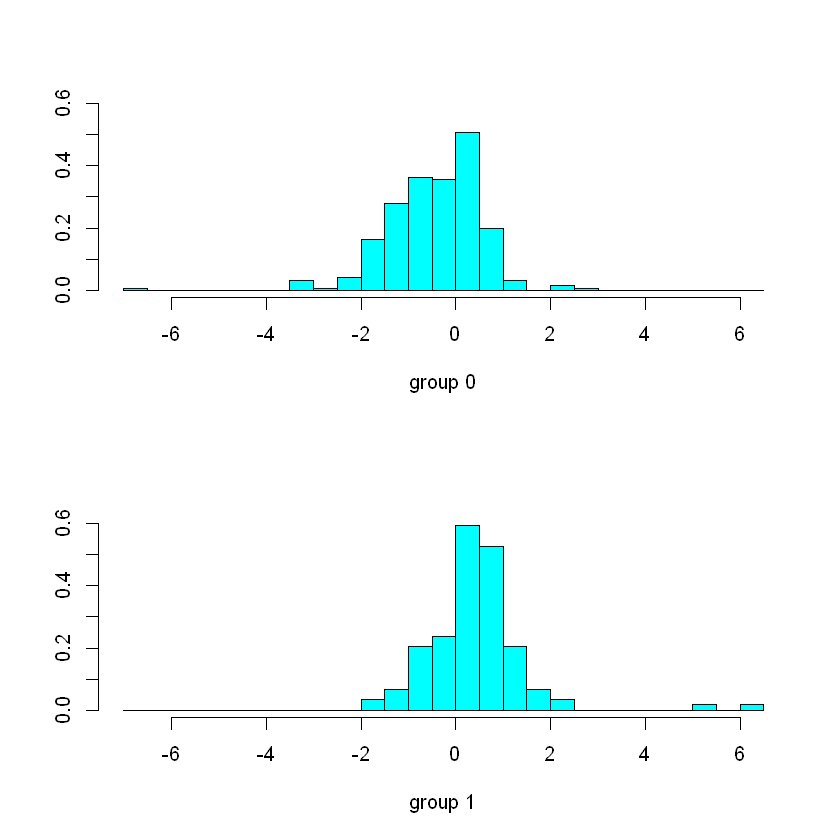

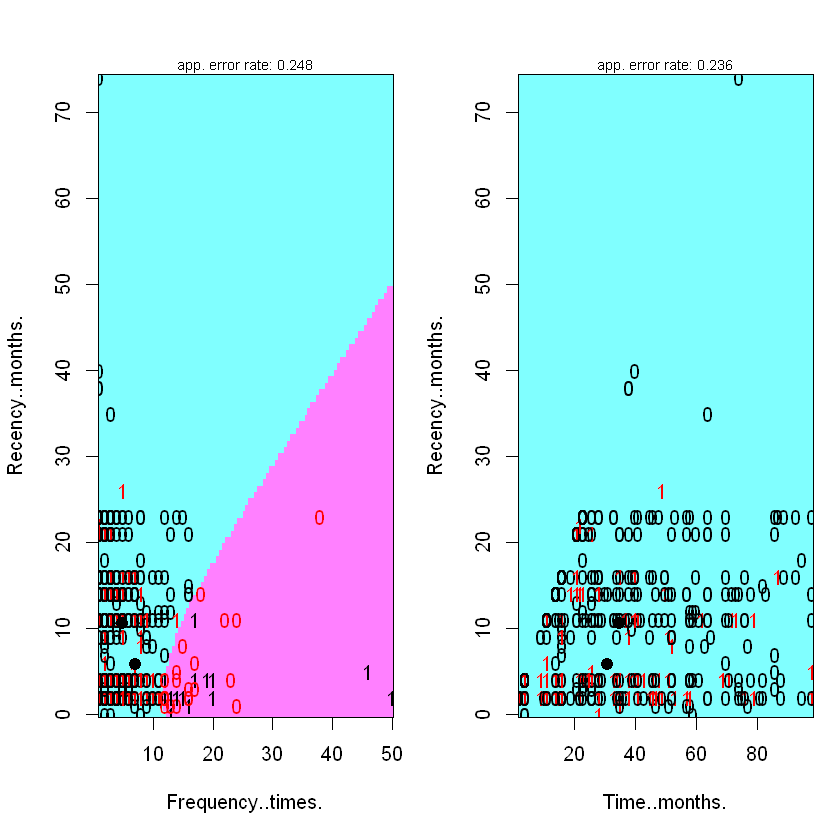

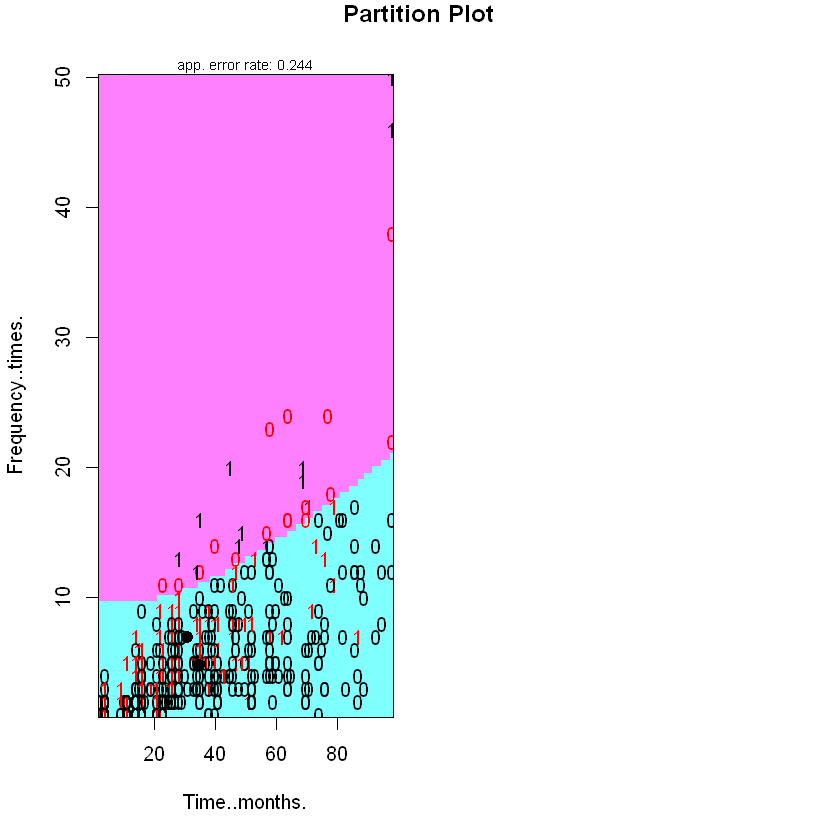

In [11]:
## Using PCA
x.pca=prcomp(x.train,center=TRUE,scale.=TRUE)
plot(x.pca)
summary(x.pca)
autoplot(x.pca, data=transfusion.training, colour = "whether.he.she.donated.blood.in.March.2007")

## Using LDA
x.lda = lda (x.train,y.train)
partimat(x.train,y.train,method="lda")
plot(x.lda)

## Using QDA
x.qda = qda (x.train,y.train)
partimat(x.train,y.train,method="qda")

keepPCA = c(1,2)
x.train.red = x.pca$x[,keepPCA]
x.test.red = predict(x.pca,x.test)[, keepPCA]

### Supervised learning

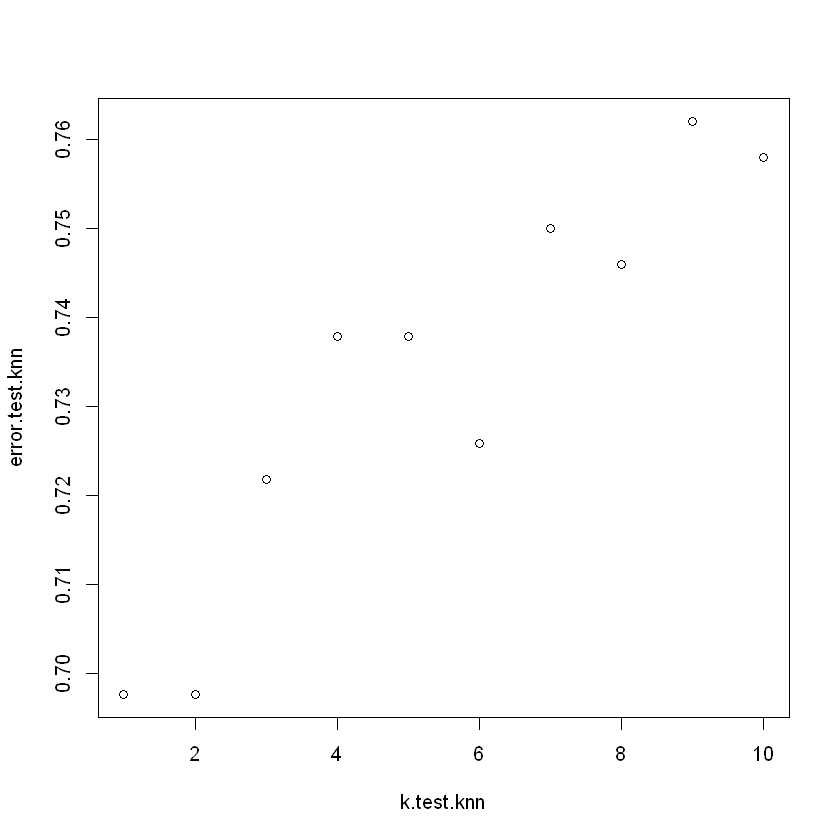

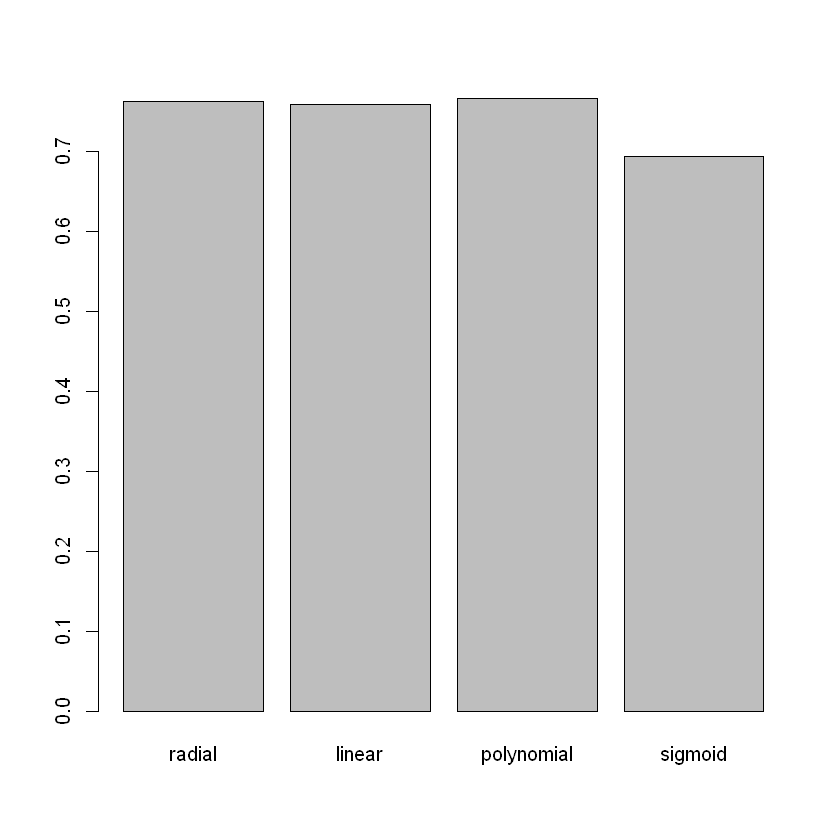

In [12]:
## KNN
y.test.knn = NULL
error.test.knn = NULL
k.test.knn = seq(1,10)
for(k.test in k.test.knn){
  y.test.knn.tmp = knn(x.train.red,x.test.red,y.train,k=k.test) 
  error.test.knn.tmp = sum(y.test.knn.tmp==y.test) / nrow(x.test)
  y.test.knn = c(y.test.knn,y.test.knn.tmp)
  error.test.knn = c(error.test.knn,error.test.knn.tmp)
}
plot(k.test.knn,error.test.knn)

## SVM
y.test.svm = NULL
error.test.svm = NULL
kernel.test.svm = c("radial","linear","polynomial","sigmoid")
for(kernel.test in kernel.test.svm ){
  #svm_tune = tune(svm, x.train.red, y.train,kernel=kernel.test, ranges=list(cost=10^(-1:2), gamma=seq(.5,3,0.5)))
  #x.svm = svm_tune$best.model
  x.svm <- svm(x.train.red,y.train,kernel=kernel.test)
  y.test.svm.tmp <- predict(x.svm,x.test.red)
  error.test.svm.tmp <- sum(y.test.svm.tmp==y.test) / nrow(x.test)
  y.test.svm <- c(y.test.svm,y.test.svm.tmp)
  error.test.svm <- c(error.test.svm,error.test.svm.tmp)
}
barplot(error.test.svm,names.arg=kernel.test.svm)